# K-Means (Countries Data)

Goal:
Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("CIA_Country_Facts.csv")

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.shape

(227, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


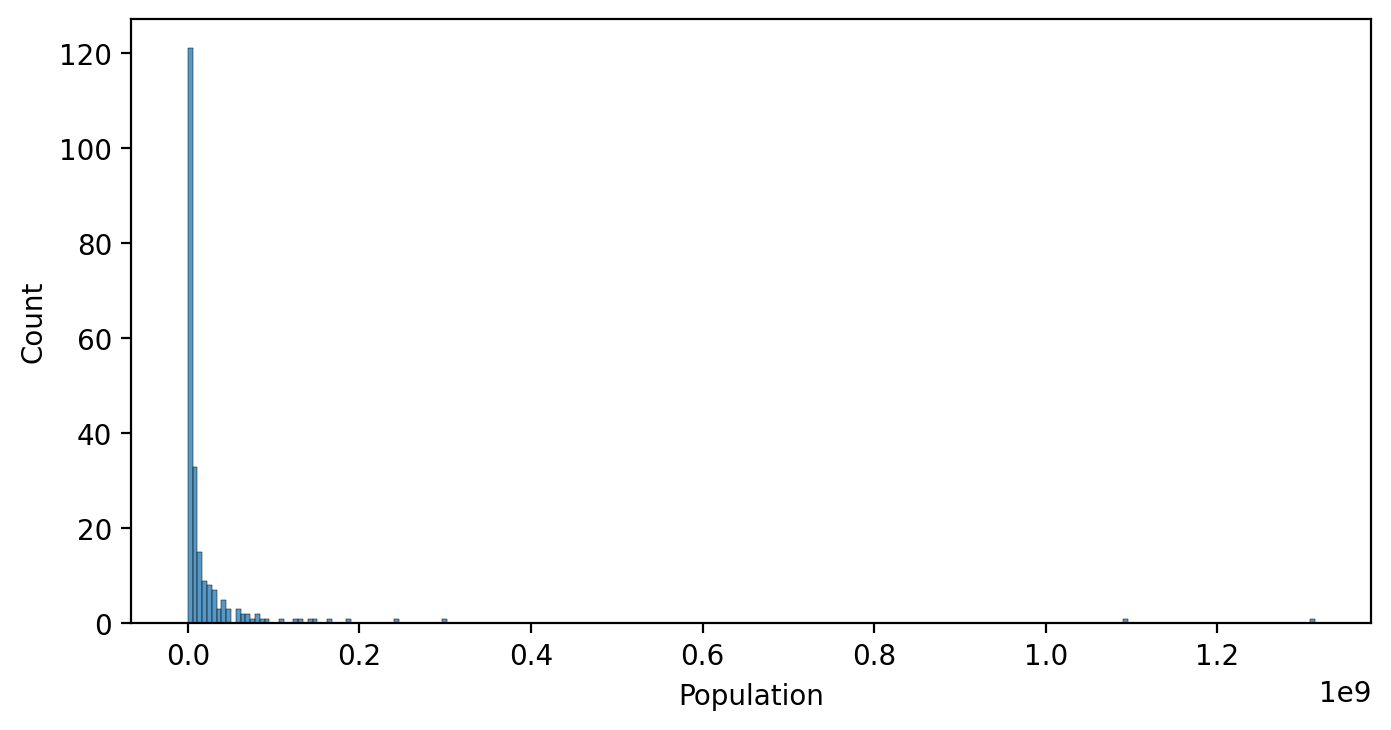

In [10]:
# Poplulation:

plt.figure(figsize= (8,4), dpi= 200)
sns.histplot(data= df, x= "Population")
plt.show()

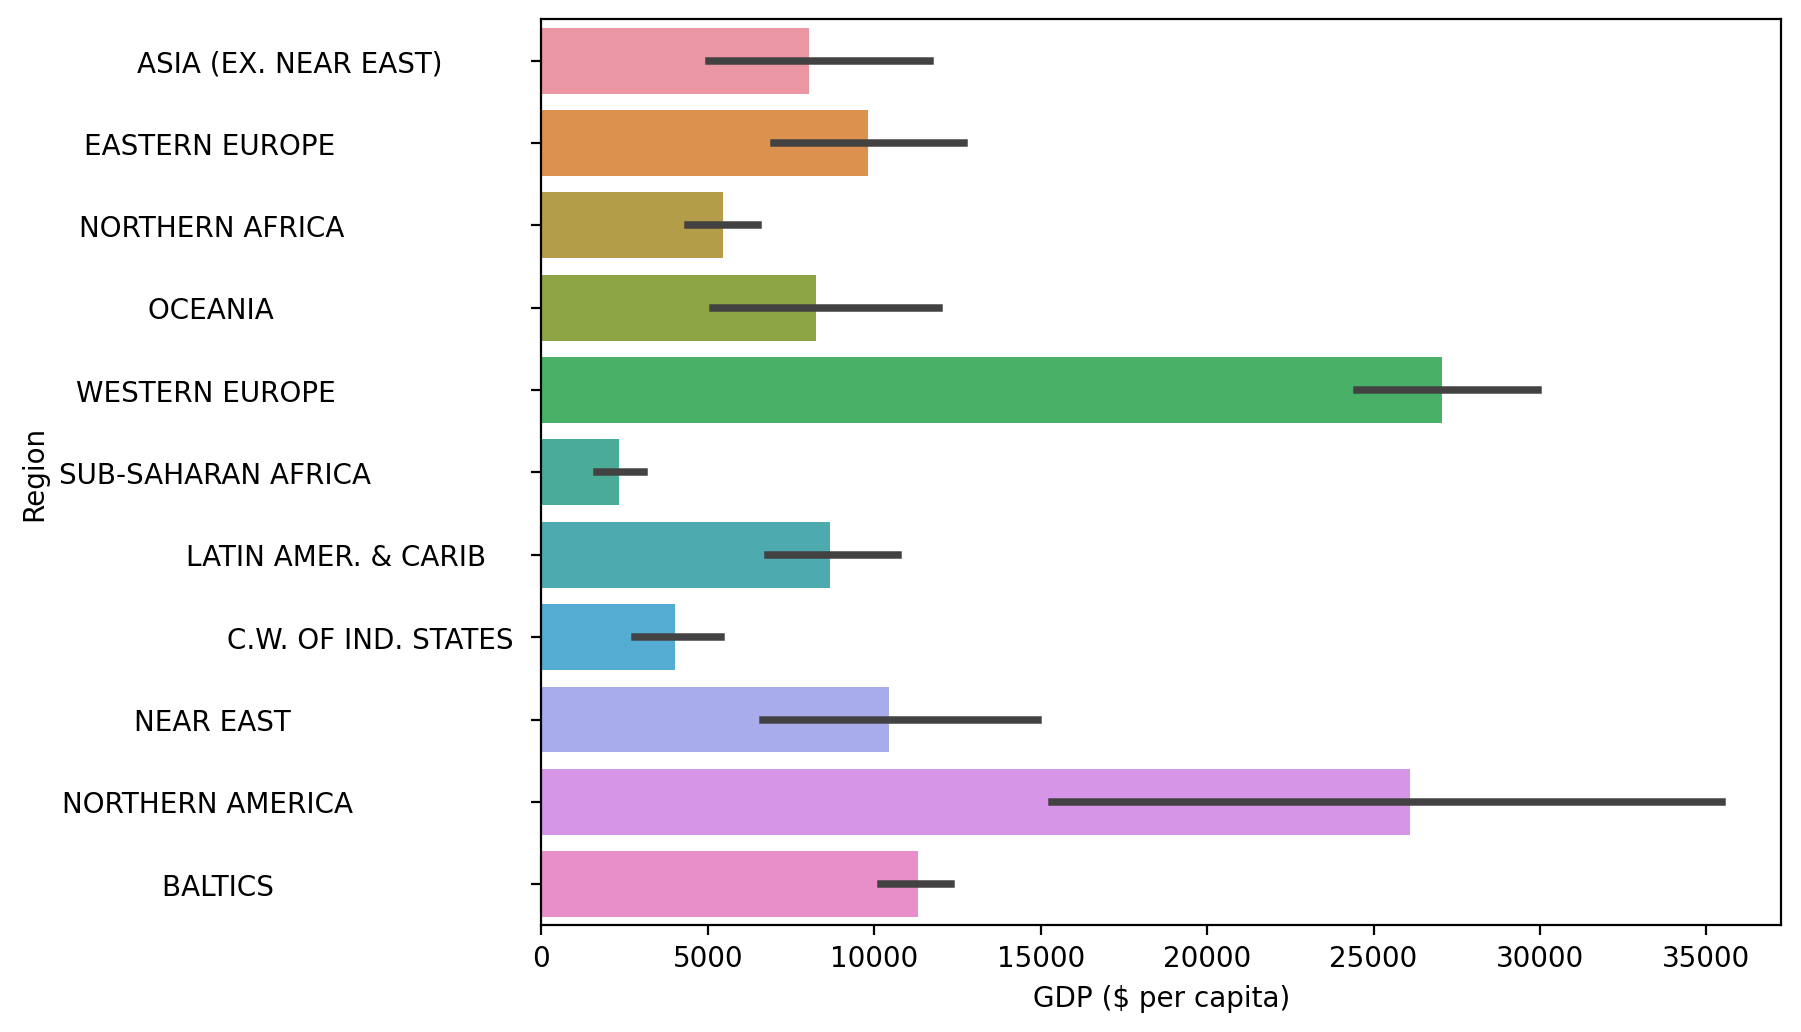

In [12]:
# Region Wise GDP:

plt.figure(figsize= (8,6), dpi= 200)
sns.barplot(data= df, x= "GDP ($ per capita)", y= "Region")
plt.show()

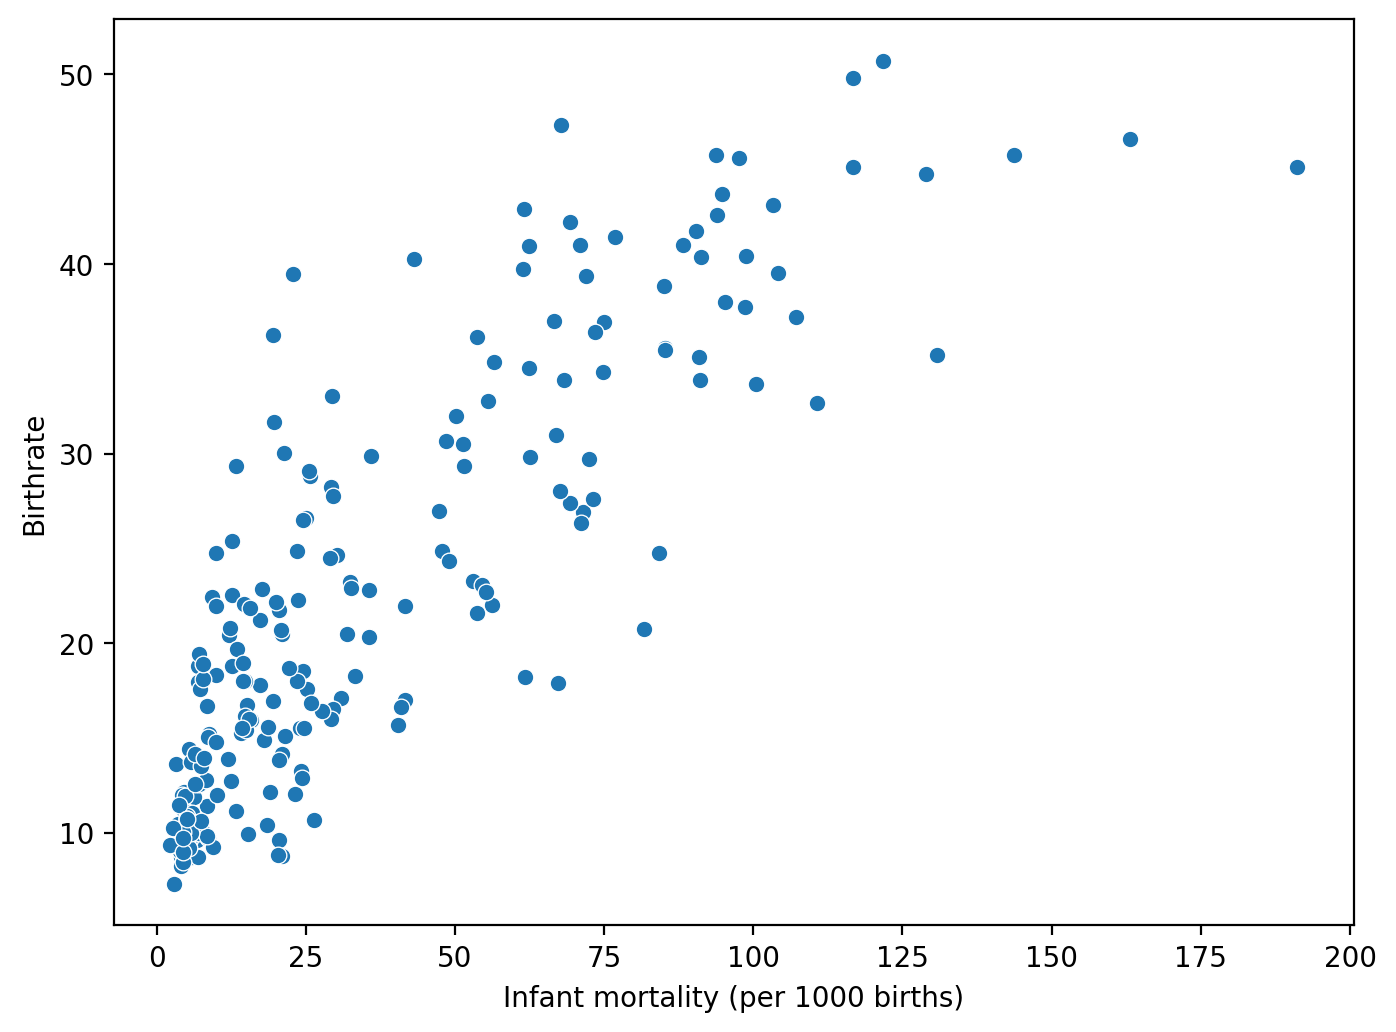

In [13]:
# Infant Mortality Rate vs. Birth Rate:

plt.figure(figsize= (8,6), dpi= 200)
sns.scatterplot(data= df, x= "Infant mortality (per 1000 births)", y= "Birthrate")
plt.show()

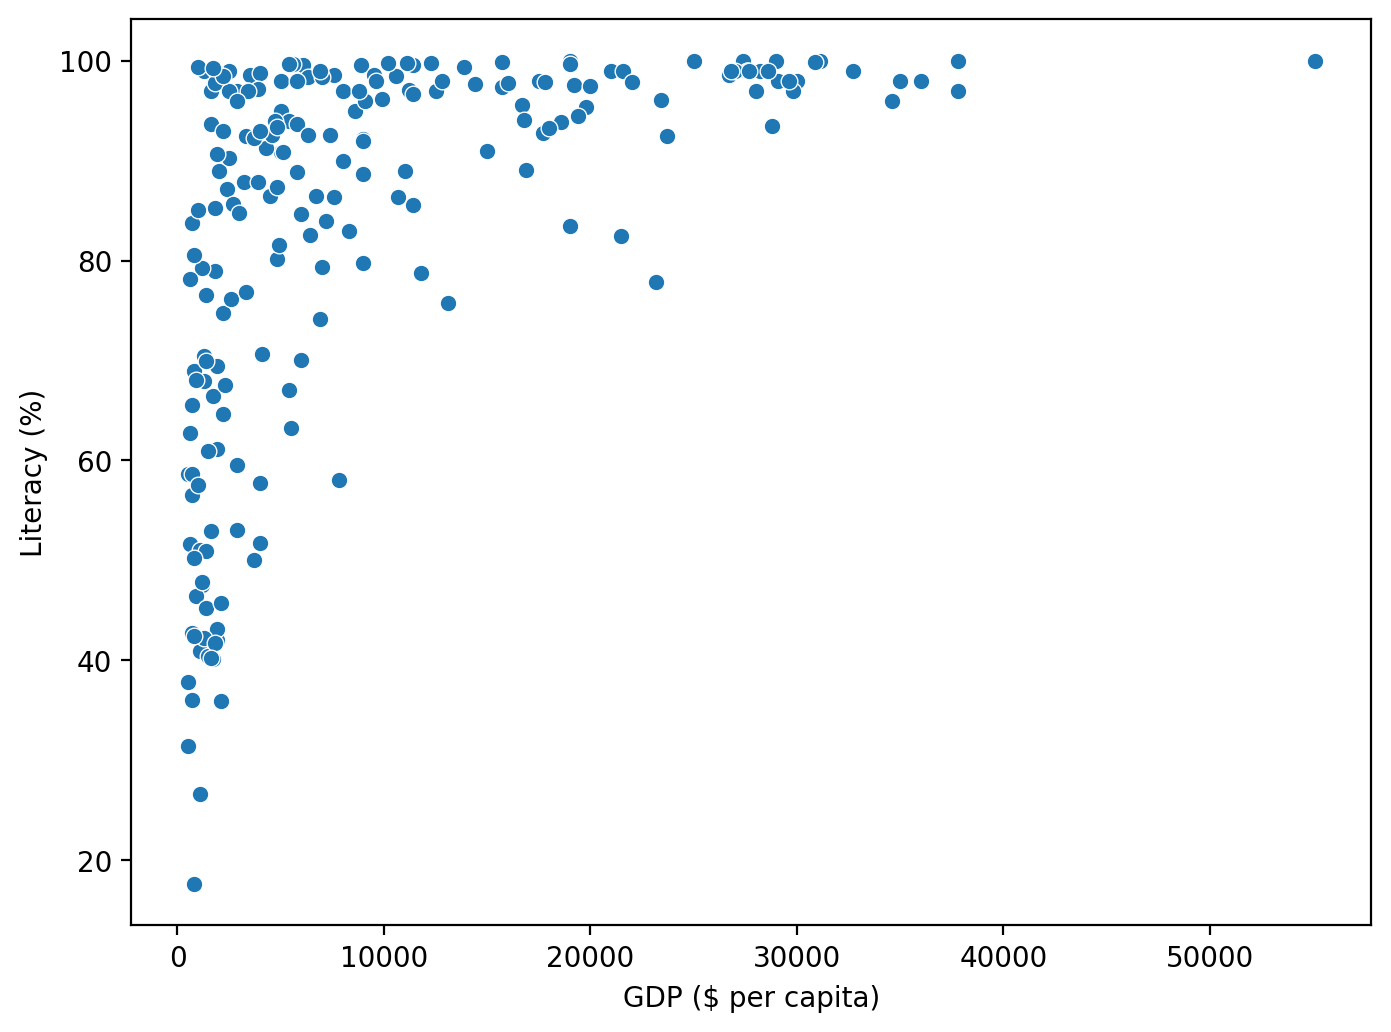

In [16]:
# GDP Vs. Literacy:

plt.figure(figsize= (8,6), dpi= 200)
sns.scatterplot(data= df, x= "GDP ($ per capita)", y= "Literacy (%)")
plt.show()

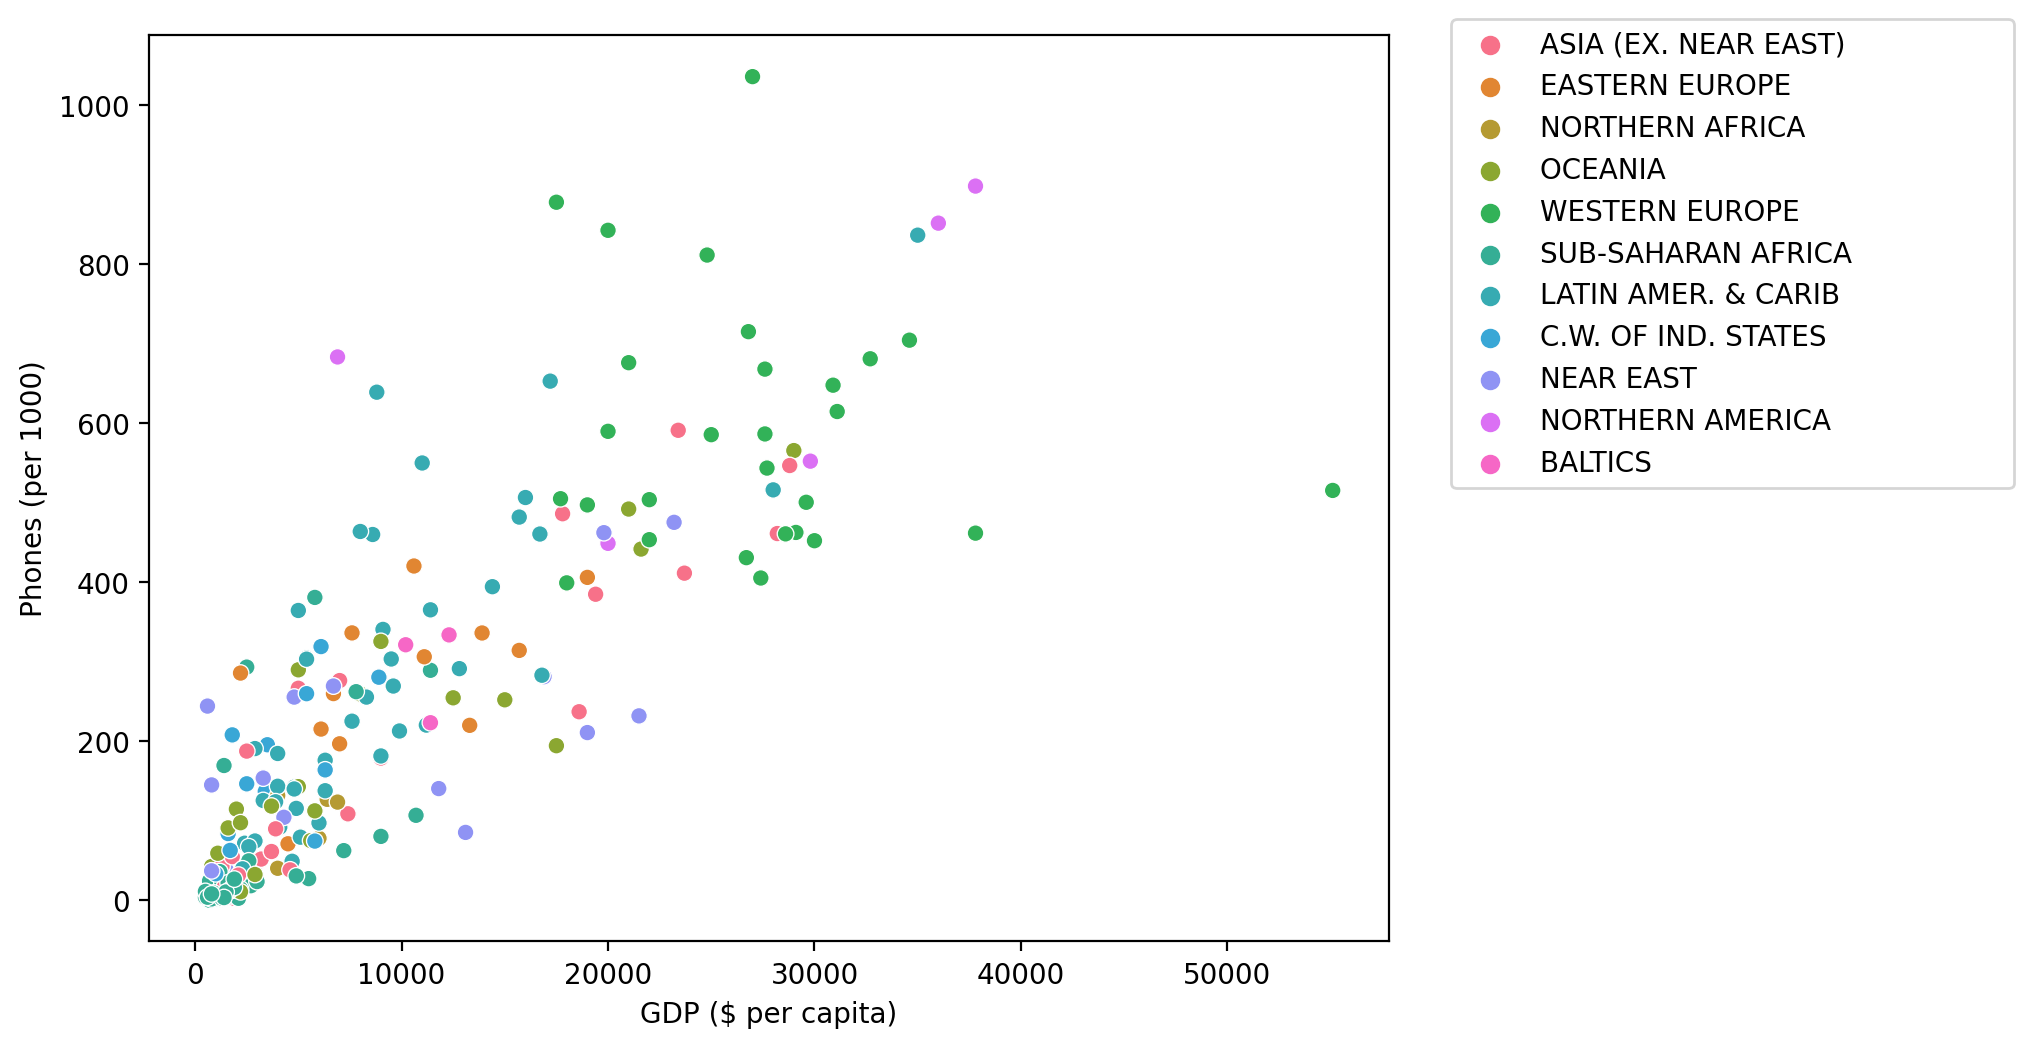

In [18]:
# GDP vs. Phones per 1000 People:

plt.figure(figsize=(8,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5))
plt.show()

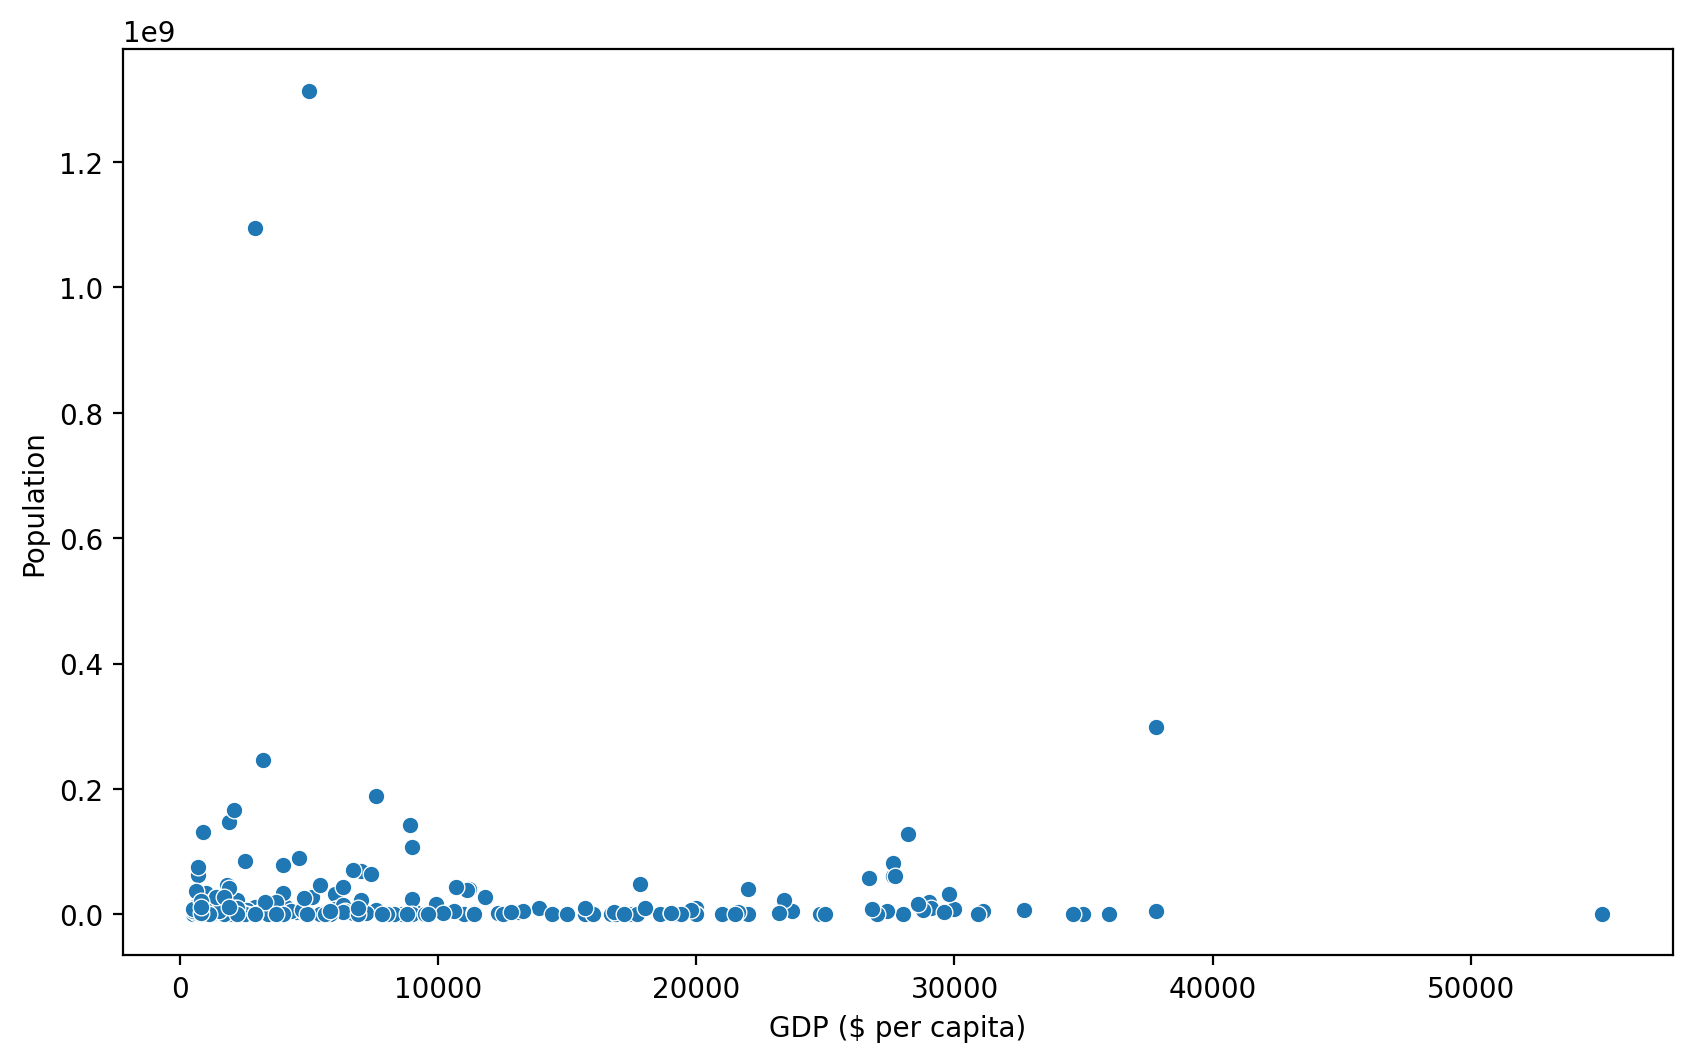

In [19]:
# Population Vs. GDP:

plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Population')
plt.show()

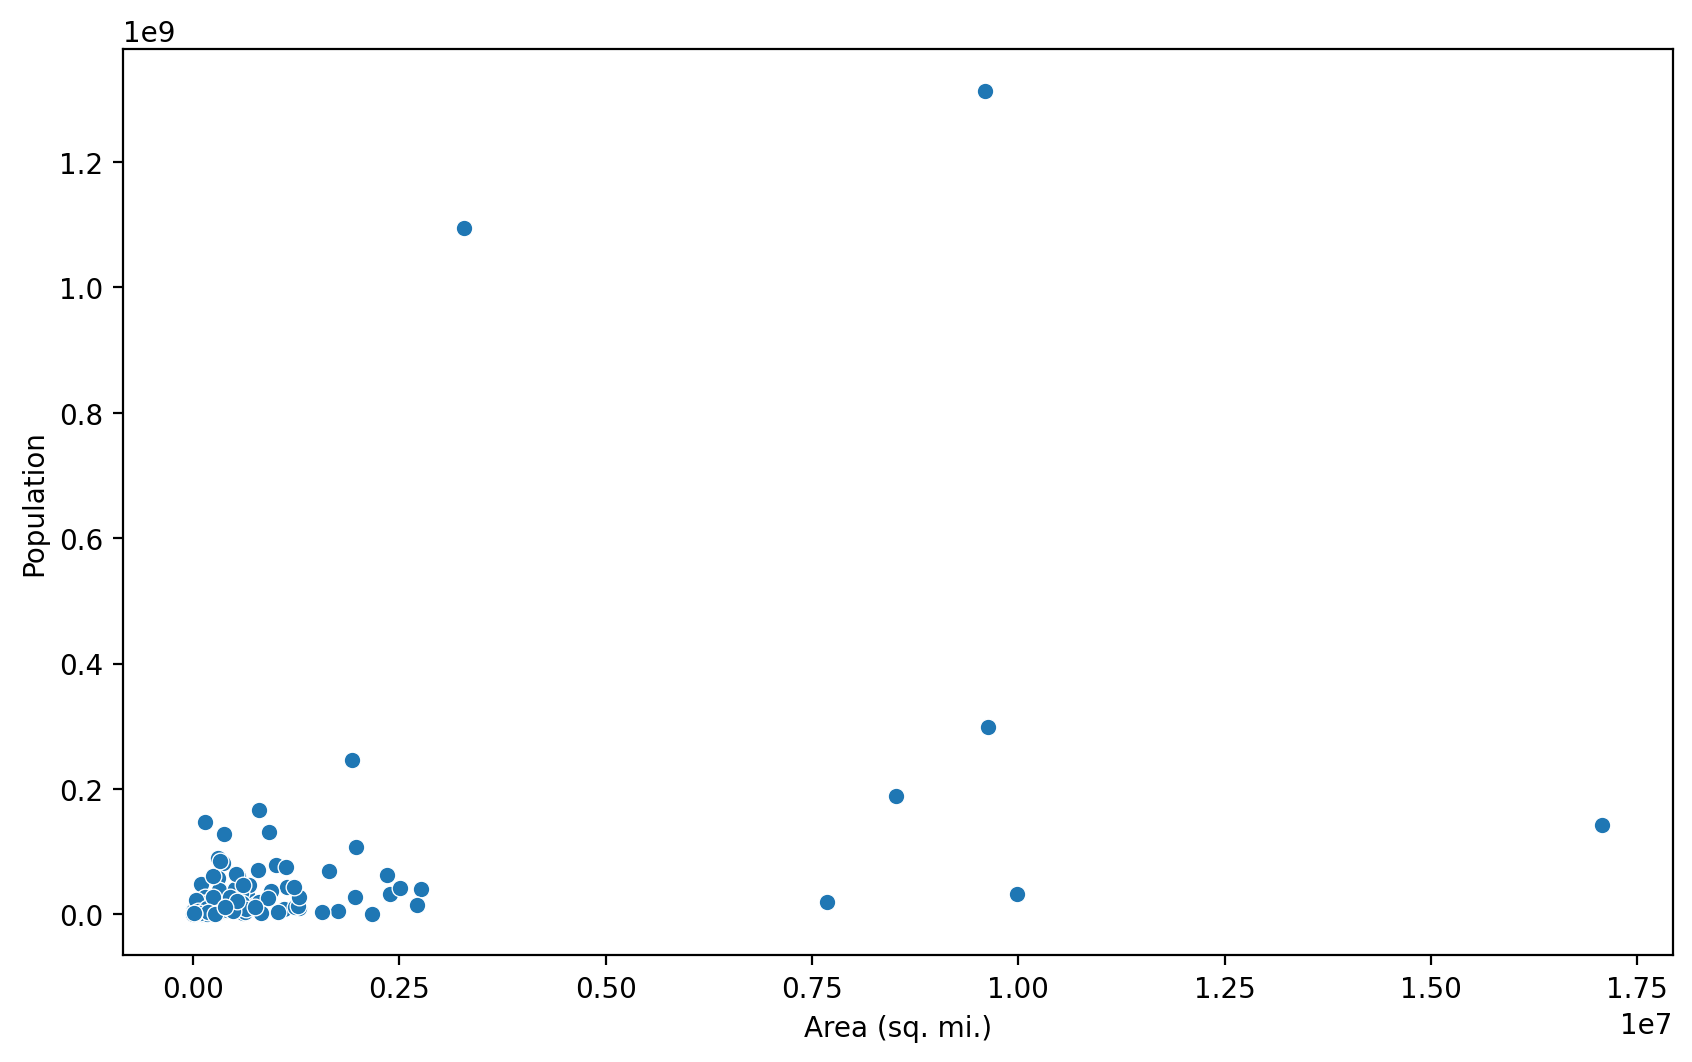

In [20]:
# Area vs. Population:

plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='Area (sq. mi.)',y='Population')
plt.show()

### Dealing With Missing Values:

In [21]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [25]:
# "Agriculture"

df[df["Agriculture"].isna()][["Country", "Population", "Area (sq. mi.)"]]

,Country,Population,Area (sq. mi.)
3,American Samoa,57794,199
4,Andorra,71201,468
78,Gibraltar,27928,7
80,Greenland,56361,2166086
83,Guam,171019,541
134,Mayotte,201234,374
140,Montserrat,9439,102
144,Nauru,13287,21
153,N. Mariana Islands,82459,477
171,Saint Helena,7502,413


In [ ]:
# Most of these are either very small countries or have very less population.
# We can fill Missing Values for these as 0.

In [26]:
df[df["Agriculture"].isna()] = df[df["Agriculture"].isna()].fillna(0)

In [27]:
df[df["Agriculture"].isna()][["Country", "Population", "Area (sq. mi.)"]]

,Country,Population,Area (sq. mi.)


In [28]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [29]:
# Climate:

# Filling Climate of Countries with Average Climate of the Same Region.

https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

In [30]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [31]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [32]:
# Literacy (%):

# Doing Same thing that we did with Climate.

In [33]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [34]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [35]:
# Dropping other Missing Value Rows.

df = df.dropna()

In [36]:
df.shape

(221, 20)

In [37]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### Dummies for Categorical Features:

In [38]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


In [39]:
# we don't need Country name

x = pd.get_dummies(df.drop("Country", axis= 1))

In [40]:
x.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Scalling:

In [41]:
sc= StandardScaler()

In [42]:
temp = sc.fit_transform(x)
x = pd.DataFrame(temp, columns= x.columns)
x.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,0.013329,0.018554,-0.203087,-0.281437,4.731286,3.589712,-0.886390,-1.986763,-1.021310,-0.125055,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,-0.547723,-0.365148
1,-0.217301,-0.323709,-0.143785,-0.263919,-1.009080,-0.397691,-0.506851,0.232886,-0.711124,0.562077,...,-0.117309,-0.239617,4.369314,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,-0.547723,-0.365148
2,0.029051,0.977850,-0.229563,-0.280881,-0.077988,-0.130643,-0.357033,-0.492346,-0.679649,-0.808353,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,5.986095,-0.152145,-0.315440,-0.547723,-0.365148
3,-0.246881,-0.339501,-0.015428,0.528961,-4.245343,-0.742768,-0.157275,0.694397,0.147817,-0.288402,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,3.170173,-0.547723,-0.365148
4,-0.246768,-0.339352,-0.122496,-0.281437,1.355565,-0.889813,0.941391,0.826257,1.232099,-0.885041,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,-0.547723,2.738613


### Finding Optimal Number of Clusters using Inertia and Silhouette Score:

In [43]:
inertia_list = []
sil_score = []

for k in range(2,26):
    
    kmc = KMeans(n_clusters= k)
    
    clusters = kmc.fit_predict(x)
    
    inertia_list.append(kmc.inertia_)
    
    sil_score.append(silhouette_score(x, clusters))

In [44]:
inertia_list

[5502.407136537519,
 4995.330953562244,
 4677.212168396981,
 4383.828340782021,
 4131.574917565428,
 3874.2058058597904,
 3550.9764164009644,
 3302.1118927615616,
 3021.337807203974,
 2797.7817732279373,
 2686.5670248575757,
 2471.623171098789,
 2344.5365783820816,
 2156.878615868157,
 2116.784277821306,
 1986.5283328999376,
 1953.5281823563428,
 1785.5944499811399,
 1742.1360050493872,
 1684.8933786401751,
 1666.4952009581316,
 1577.2987241129763,
 1530.7931627410032,
 1485.8045646446878]

In [45]:
sil_score

[0.1517983310869444,
 0.15303709495851545,
 0.17890913094905153,
 0.1948566429586823,
 0.2309494532477942,
 0.23823478351239083,
 0.2617685783790449,
 0.2800986708899083,
 0.29160342069768325,
 0.31299169095779744,
 0.30547548714511635,
 0.29289235597295454,
 0.32340250119700814,
 0.30322985440260214,
 0.3067058399889199,
 0.31736785956512864,
 0.31938314266878115,
 0.28022500563943253,
 0.3100569451421247,
 0.28933800815476035,
 0.2704069379426616,
 0.28077467384720795,
 0.2864405909396748,
 0.27719366107676824]

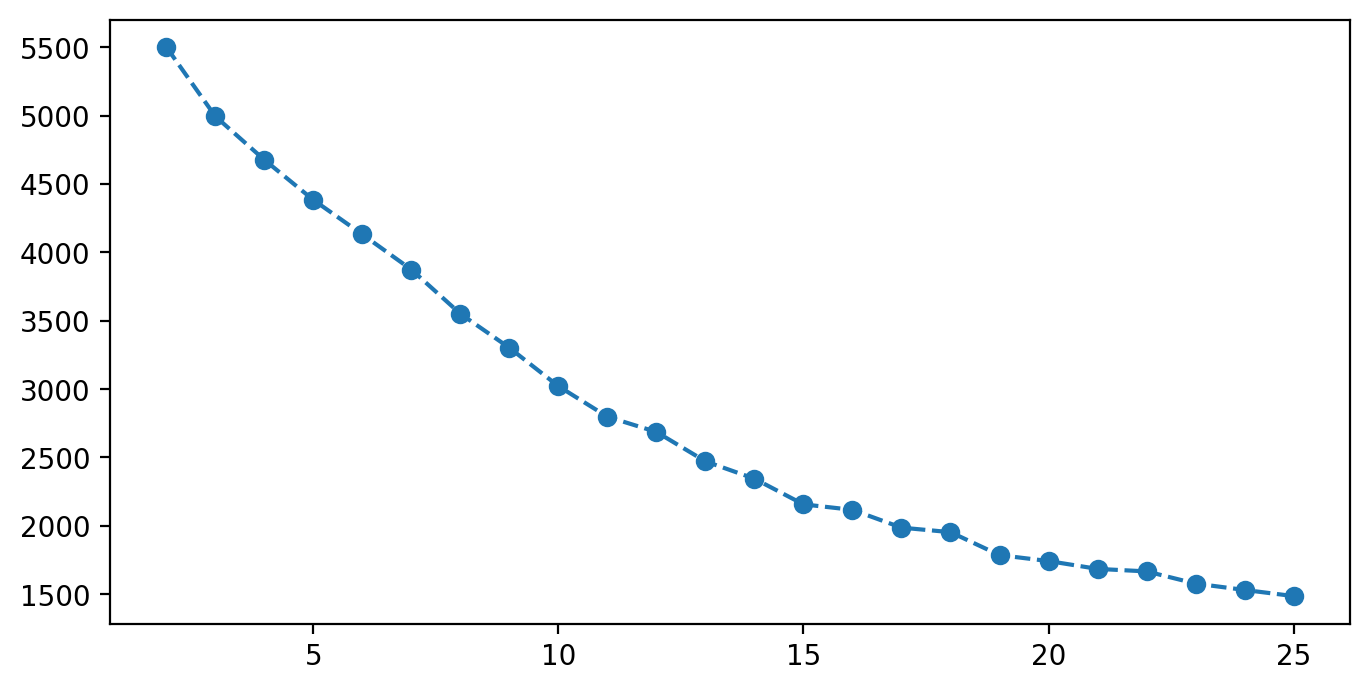

In [49]:
plt.figure(figsize= (8,4), dpi= 200)
plt.plot(range(2,26), inertia_list, "o--")
plt.show()

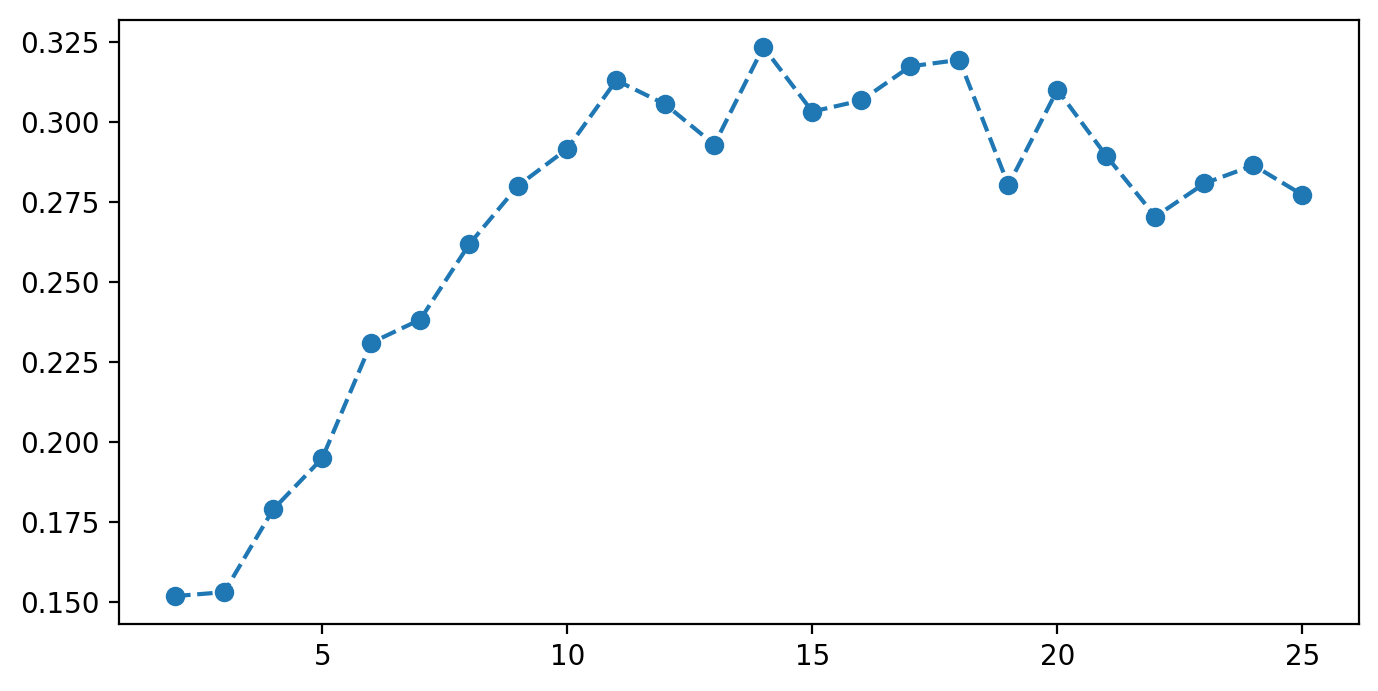

In [50]:
plt.figure(figsize= (8,4), dpi= 200)
plt.plot(range(2,26), sil_score, "o--")
plt.show()

In [51]:
# 14 Seems to be Optimal Number of Clusters.